In [1]:
import numpy as np
import pandas as pd

import random

In [2]:
def rotate_rect_dimensions(length, width, angle_degrees):
    # 将角度转换为弧度
    angle_radians = np.radians(angle_degrees)

    # 计算旋转后的外切矩形的长和宽
    rotated_length = abs(length * np.cos(angle_radians)) + abs(width * np.sin(angle_radians))
    rotated_width = abs(length * np.sin(angle_radians)) + abs(width * np.cos(angle_radians))

    return rotated_length, rotated_width

In [3]:
rotated_length, rotated_width = rotate_rect_dimensions(393, 69, 0)
rotated_length, rotated_width

(393.0, 69.0)

In [4]:
"""
改变量：
长轴a：25~400
短轴b: 25~400
周期Px：50~600
周期Py：50~600
旋转角度φ：0~180
"""

'\n改变量：\n长轴a：25~400\n短轴b: 25~400\n周期Px：50~600\n周期Py：50~600\n旋转角度φ：0~180\n'

In [5]:
import pandas as pd
import random

# Set the random seed for reproducibility
random.seed(42)

# Number of data points
num_data_points = 5000000


# Number of segments for each variable
num_segments = 10

# Define the ranges for each parameter
L_range = (25, 400)
W_range = (25, 400)
phi_range = (0, 180)
px_range = (50, 600)
py_range = (50, 600)

# Generate random data
data = {
    'a': [],
    'b': [],
    'phi': [],
    'Px': [],
    'Py': [],
}

# Generate remaining random data
for _ in range(num_data_points):
    data['a'].append(random.randint(*L_range))
    data['b'].append(random.randint(*W_range))
    data['phi'].append(random.randint(*phi_range))
    data['Px'].append(random.randint(*px_range))
    data['Py'].append(random.randint(*py_range))


# Create a DataFrame
df = pd.DataFrame(data)



In [6]:
df

,a,b,phi,Px,Py
0,352,82,6,331,300
1,139,96,26,139,482
2,41,40,23,273,288
3,283,333,6,253,479
4,137,254,150,334,56
...,...,...,...,...,...
4999995,300,178,166,162,382
4999996,42,121,58,342,314
4999997,289,382,14,371,512
4999998,50,148,135,56,273


In [7]:
import pandas as pd
import numpy as np


def filter_data(df):
    """
    过滤数据的函数。

    参数：
    df (DataFrame): 包含原始数据的DataFrame。

    返回：
    DataFrame: 过滤后的DataFrame。
    """
    # 定义过滤条件
    def condition1(df):
        return df['b'] <= df['Py']

    def condition2(df):
        return df['a'] <= df['Px']

    def condition3(df):
        # 计算旋转后的矩形尺寸
        df['rotated_length'], df['rotated_width'] = zip(*df.apply(lambda row: rotate_rect_dimensions(row['a'], row['b'], row['phi']), axis=1))

        # 添加过滤条件
        return (df['rotated_length'] <= df['Px']) & (df['rotated_width'] <= df['Py'])

    # 使用逻辑与连接所有过滤条件
    combined_condition = pd.Series(True, index=df.index)
    for condition in [condition1,condition2,condition3]:
        combined_condition = combined_condition & condition(df)

    # 根据过滤条件进行筛选
    filtered_df = df[combined_condition]

    return filtered_df

# 读取数据
# df = pd.read_csv('random_data_with_segments.csv')

# 使用函数过滤数据
filtered_df = filter_data(df)

# 打印过滤前后的数据数量
print(f"过滤前的数据数量: {len(df)}")
print(f"过滤后的数据数量: {len(filtered_df)}")

# 如果需要保存过滤后的数据，可以使用以下代码
# filtered_df.to_csv('filtered_data.csv', index=False)


过滤前的数据数量: 5000000
过滤后的数据数量: 1794978


In [8]:
filtered_df = filtered_df[['a', 'b', 'Px', 'Py', 'phi']]

In [9]:
filtered_df

,a,b,Px,Py,phi
2,41,40,273,288,23
6,104,135,154,144,86
7,219,74,402,320,91
9,218,65,350,420,141
12,76,219,514,423,71
...,...,...,...,...,...
4999986,333,47,337,378,53
4999988,243,238,465,592,75
4999989,40,151,384,540,131
4999996,42,121,342,314,58


In [10]:
### 先从数据中sample 20万条
data_35w = filtered_df.sample(n=350000, random_state=42)


array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'Px'}>, <Axes: title={'center': 'Py'}>],
       [<Axes: title={'center': 'phi'}>, <Axes: >]], dtype=object)

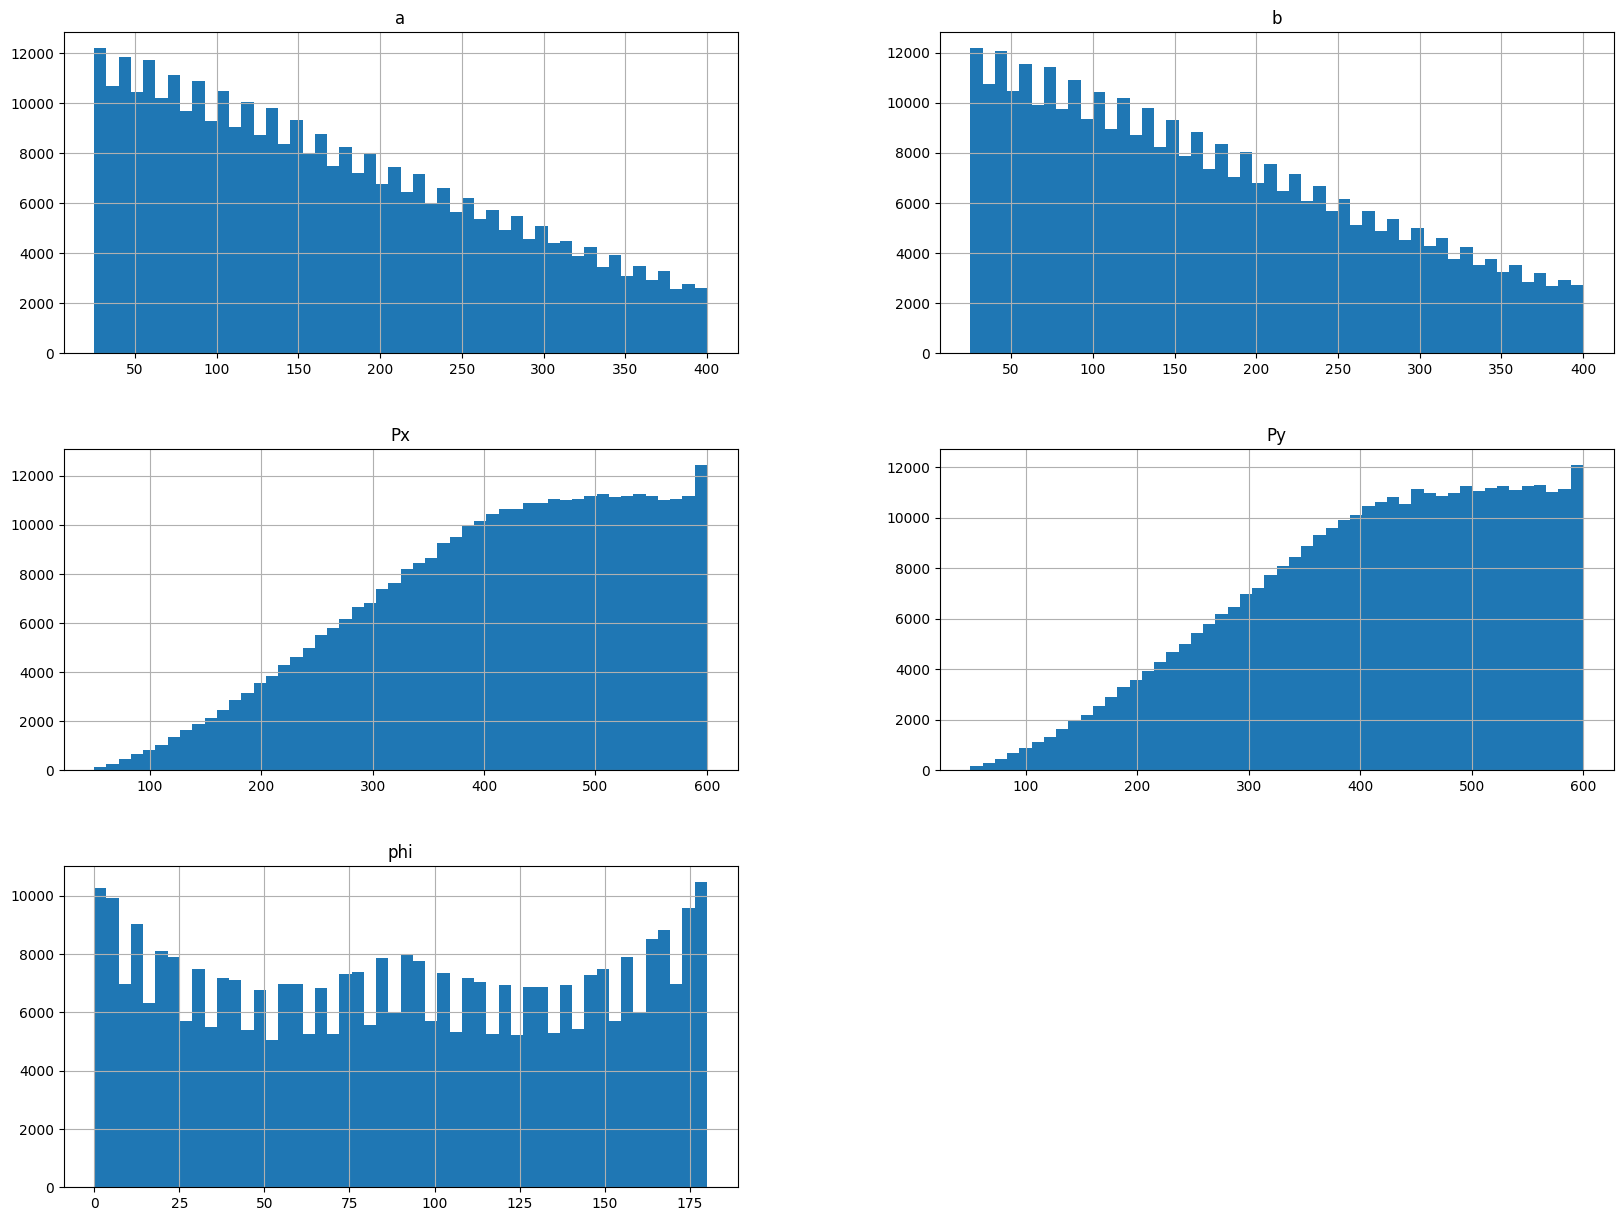

In [11]:
data_35w.hist(bins=50, figsize=(20, 15))


In [12]:
data_35w.insert(0, 'Pic', None)
data_35w.insert(0, 'type', "ellipse")

In [13]:
# 将索引重置为从0开始的连续整数
data_35w.reset_index(drop=True, inplace=True)
data_35w

,type,Pic,a,b,Px,Py,phi
0,ellipse,None,213,249,410,547,48
1,ellipse,None,385,329,544,520,125
2,ellipse,None,204,34,474,434,5
3,ellipse,None,95,319,517,578,53
4,ellipse,None,59,86,407,354,49
...,...,...,...,...,...,...,...
349995,ellipse,None,167,25,291,244,57
349996,ellipse,None,190,215,264,300,167
349997,ellipse,None,245,267,462,466,9
349998,ellipse,None,27,109,91,180,7


In [15]:
from tqdm import tqdm
for i in tqdm(range(len(data_35w))):
    a = data_35w.iloc[i]['a']
    b = data_35w.iloc[i]['b']
    Px = data_35w.iloc[i]['Px']
    Py = data_35w.iloc[i]['Py']
    phi = data_35w.iloc[i]['phi']
    pic_name = f'a={a}=b={b}=phi={phi}=Px={Px}=Py={Py}.png'
    data_35w.loc[i,"Pic"] = pic_name

100%|██████████| 350000/350000 [00:59<00:00, 5854.51it/s]


In [16]:
data_35w

,type,Pic,a,b,Px,Py,phi
0,ellipse,a=213=b=249=phi=48=Px=410=Py=547.png,213,249,410,547,48
1,ellipse,a=385=b=329=phi=125=Px=544=Py=520.png,385,329,544,520,125
2,ellipse,a=204=b=34=phi=5=Px=474=Py=434.png,204,34,474,434,5
3,ellipse,a=95=b=319=phi=53=Px=517=Py=578.png,95,319,517,578,53
4,ellipse,a=59=b=86=phi=49=Px=407=Py=354.png,59,86,407,354,49
...,...,...,...,...,...,...,...
349995,ellipse,a=167=b=25=phi=57=Px=291=Py=244.png,167,25,291,244,57
349996,ellipse,a=190=b=215=phi=167=Px=264=Py=300.png,190,215,264,300,167
349997,ellipse,a=245=b=267=phi=9=Px=462=Py=466.png,245,267,462,466,9
349998,ellipse,a=27=b=109=phi=7=Px=91=Py=180.png,27,109,91,180,7


In [18]:
data_35w.to_csv('ellipse_35w.csv', index=False)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import pandas as pd
import numpy as np
import matplotlib.transforms as transforms
# import cv2
import math
from tqdm import tqdm


In [2]:
data = pd.read_csv('ellipse_35w.csv')
data

,type,Pic,a,b,Px,Py,phi
0,ellipse,a=213=b=249=phi=48=Px=410=Py=547.png,213,249,410,547,48
1,ellipse,a=385=b=329=phi=125=Px=544=Py=520.png,385,329,544,520,125
2,ellipse,a=204=b=34=phi=5=Px=474=Py=434.png,204,34,474,434,5
3,ellipse,a=95=b=319=phi=53=Px=517=Py=578.png,95,319,517,578,53
4,ellipse,a=59=b=86=phi=49=Px=407=Py=354.png,59,86,407,354,49
...,...,...,...,...,...,...,...
349995,ellipse,a=167=b=25=phi=57=Px=291=Py=244.png,167,25,291,244,57
349996,ellipse,a=190=b=215=phi=167=Px=264=Py=300.png,190,215,264,300,167
349997,ellipse,a=245=b=267=phi=9=Px=462=Py=466.png,245,267,462,466,9
349998,ellipse,a=27=b=109=phi=7=Px=91=Py=180.png,27,109,91,180,7


In [3]:
def simple_circle_draw(save_name, A, B,a, Px, Py,phi, dir):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.set_xlim(-450, 450)
    ax.set_ylim(-450, 450)

    # 绘制白色背景
    ax.set_facecolor('white')

    # 绘制黄色矩形
    rect_center = (0, 0)  # 矩形中心点坐标
    rect_width = Px  # 矩形长度
    rect_height = Py  # 矩形宽度
    rect = patches.Rectangle((rect_center[0] - rect_width / 2, rect_center[1] - rect_height / 2),
                             rect_width, rect_height, linewidth=1, edgecolor='yellow', facecolor='yellow')
    ax.add_patch(rect)

    # 绘制红色矩形1 main
    rect_center = (0,0)  #中心点坐标
    rect_width = A  
    rect_height = B  
    angle = a  # 旋转角度
    rect_1 = patches.Ellipse((rect_center[0], rect_center[1]),
                               rect_width, rect_height, angle=angle, linewidth=1, edgecolor='red', facecolor='red')


    # 围绕画布中心进行旋转
    trans = patches.Affine2D().rotate_deg(phi) + ax.transData
    rect_1.set_transform(trans)

    ax.add_patch(rect_1)

    # rect_test = patches.Rectangle((-550/2,-200/2),550,100,angle=0,linewidth=1,edgecolor='red',facecolor='red')
    # ax.add_patch(rect_test)
    # 显示图像
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')  # 关闭坐标轴
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0, 0)
    plt.savefig(os.path.join(dir, save_name + '.png'))
    # plt.show()
    plt.close()
    # a-107-b-201-phi-3-Px-531-Py-374.png

In [4]:
save_dir = r'E:\yjl\易纪龙\lumerical\big_model_data\all_data\ellipse\pic_expand'
for i in tqdm(range(len(data))):
    num = 0
    name = os.path.splitext(data.iloc[i]['Pic'])[0]
    if os.path.exists(os.path.join(save_dir,name+'.png')) :
        continue
    else:
        if num == 50000:
            print('done')
            break 
        a = data.iloc[i]['a']
        b = data.iloc[i]['b']
        Px = data.iloc[i]['Px']
        Py = data.iloc[i]['Py']
        phi = data.iloc[i]['phi']
        simple_circle_draw(name, int(a), int(b), 0, int(Px), int(Py), int(phi), save_dir)
        plt.close("all")
        num += 1

 57%|█████▋    | 200418/350000 [17:39<33:45, 73.83it/s]   